In [9]:
import kit
from kit import penguin_color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
import palmerpenguins
pg = palmerpenguins.load_penguins().dropna()
import empiricaldist
import scipy

## Funciones de densidad de probabilidad

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

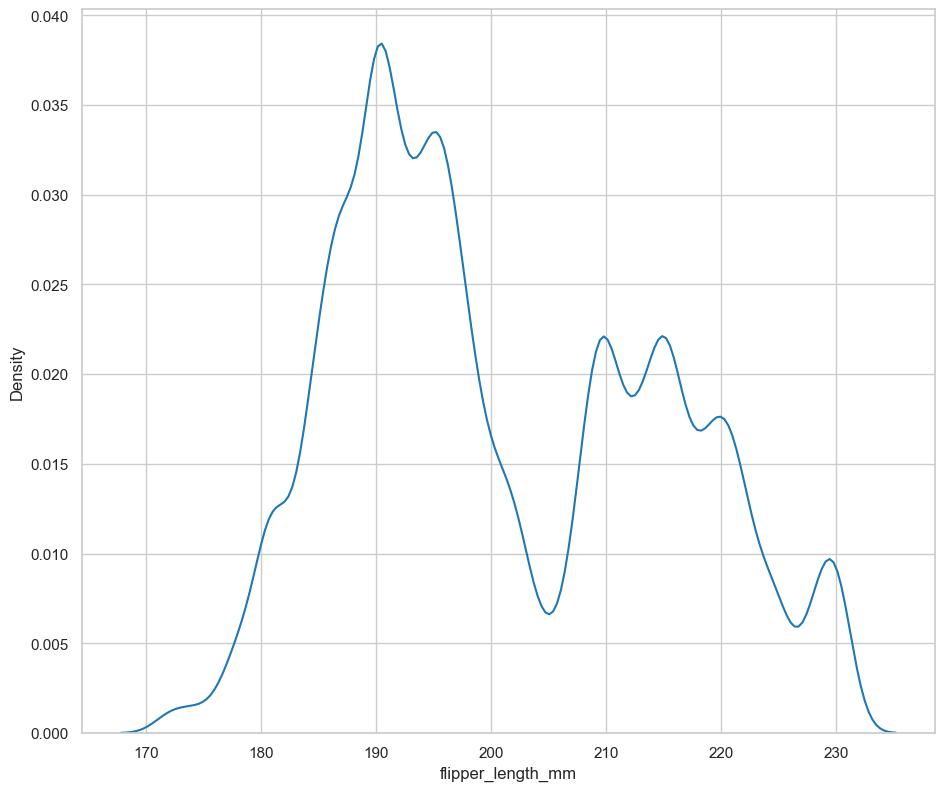

In [3]:
sns.kdeplot(
    data=pg,
    x= 'flipper_length_mm',
    bw_method= 0.1
)

In [5]:
stats = pg.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: xlabel='body_mass_g'>

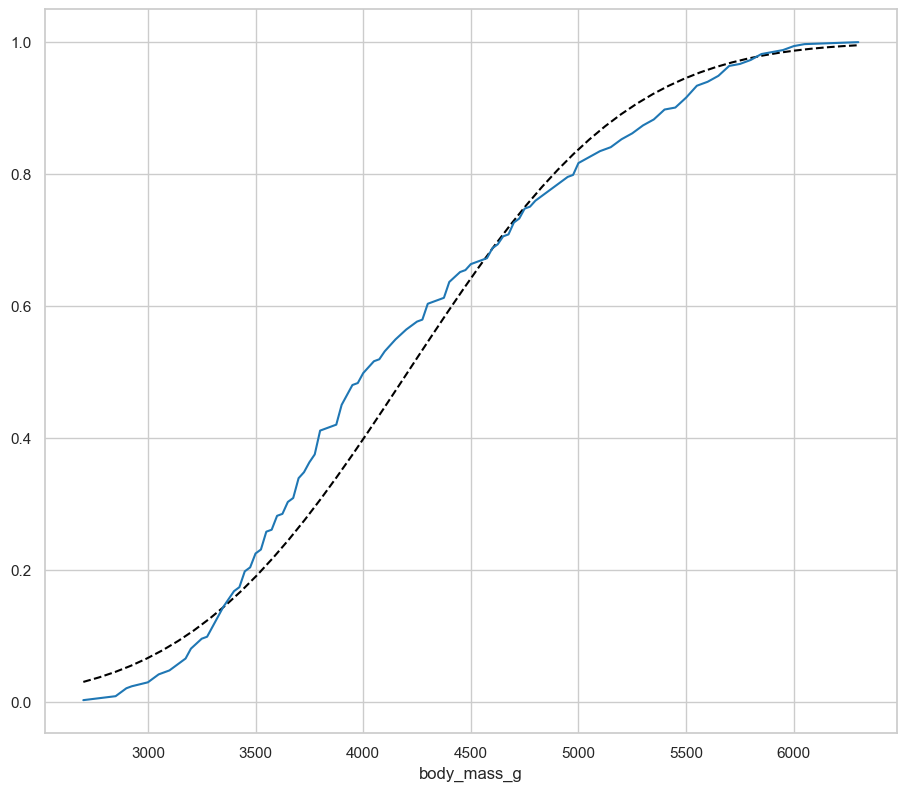

In [14]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    pg.body_mass_g,
    normalize= True
).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

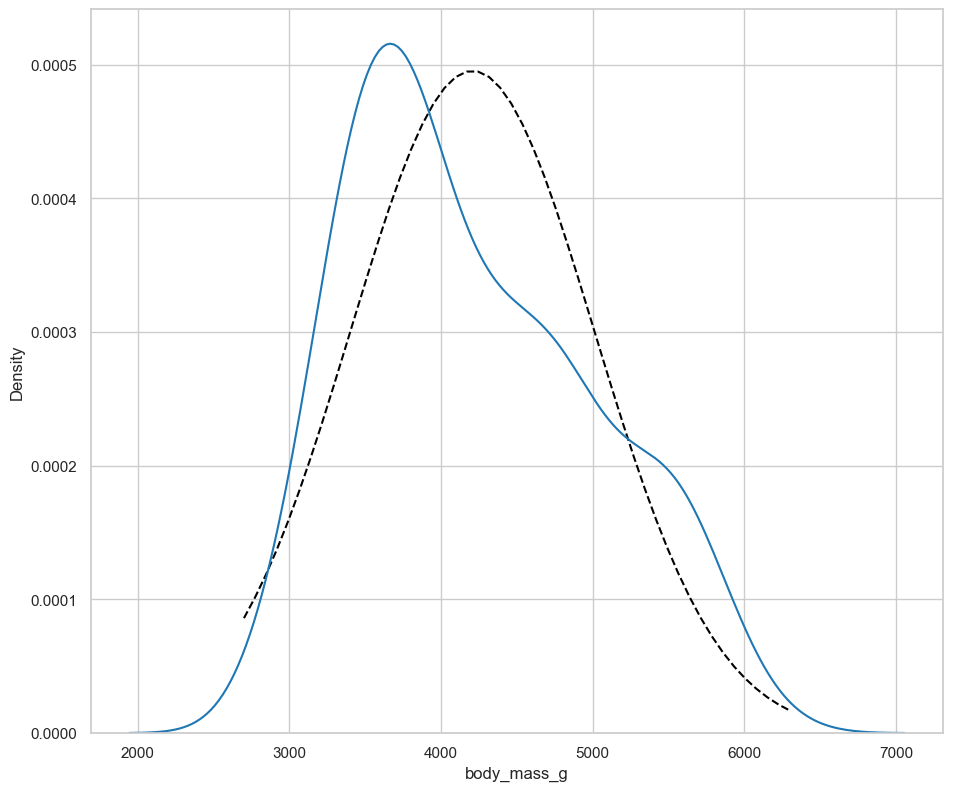

In [15]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data= pg,
    x= 'body_mass_g'
)

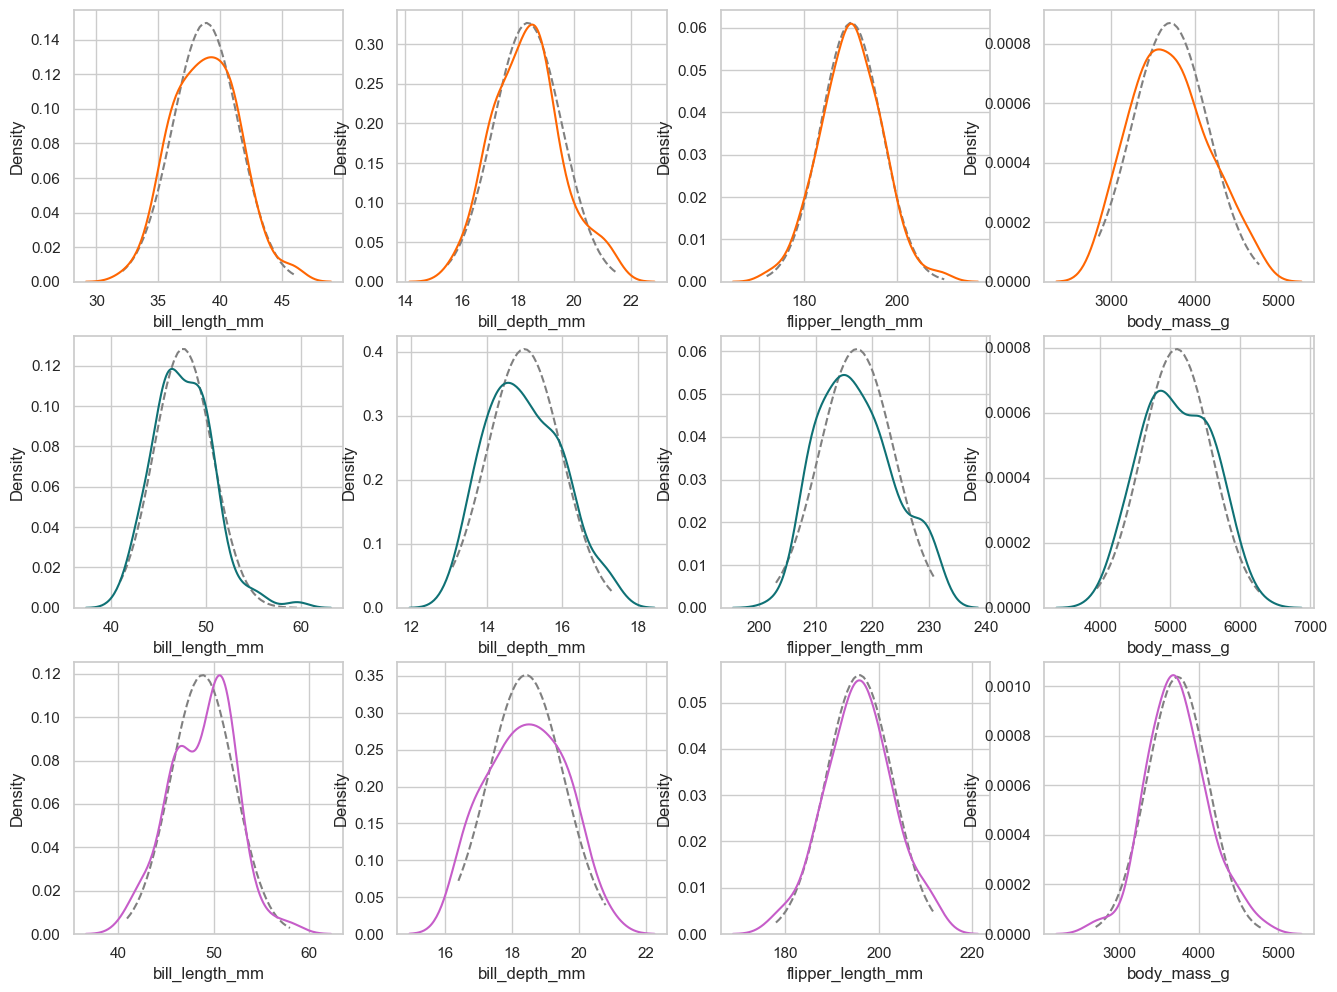

In [17]:
species = list(pg['species'].unique())
measures = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, ax = plt.subplots(len(species), len(measures), figsize=(16, 12))

for i in range(len(species)):
    for j in range(len(measures)):
        stats = pg[pg['species'] == species[i]][measures[j]].describe()

        xs = np.linspace(stats['min'], stats['max'])
        ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

        ax[i, j].plot(xs, ys, color='gray', linestyle='dashed')
        # ax[i, j].set_title(f"{species[i]} - {measures[j]}")

        sns.kdeplot(
            ax= ax[i, j],
            data= pg[pg['species'] == species[i]],
            x= measures[j],
            color= penguin_color[species[i]]
        )